In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

In [11]:
# Read customer churn dataset
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

---------------------------------1. Data Manupulation--------------------------

In [111]:
# 1. Data Manupulation
customer_5=df['Dependents']
customer_15=df['StreamingMovies']
senior_male_electronic=df[(df['gender']=='Male') & (df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
customer_total_tenure=df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
two_mail_yes = df[(df['Contract'] == "Two year") & (df['PaymentMethod'] == "Mailed check") & (df['Churn'] == 'Yes')]
customer_333=df.sample(n=333)

-----------------------------------2. Data Visualization---------------------------

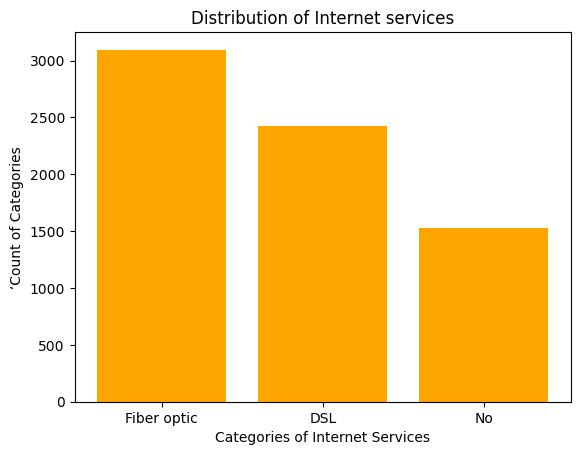

In [36]:
# 2. Data Visualization
plt.figure()
InternetServices=df.InternetService.value_counts()
plt.bar(InternetServices.index,InternetServices.values,color='orange')
plt.xlabel('Categories of Internet Services')
plt.ylabel('‘Count of Categories')
plt.title('Distribution of Internet services')
plt.show()

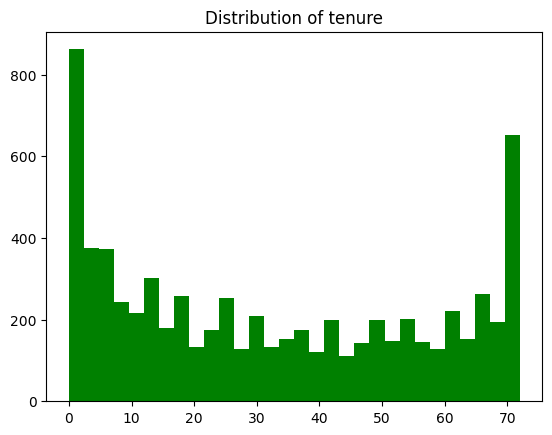

In [39]:
plt.figure()
plt.hist(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')
plt.show()

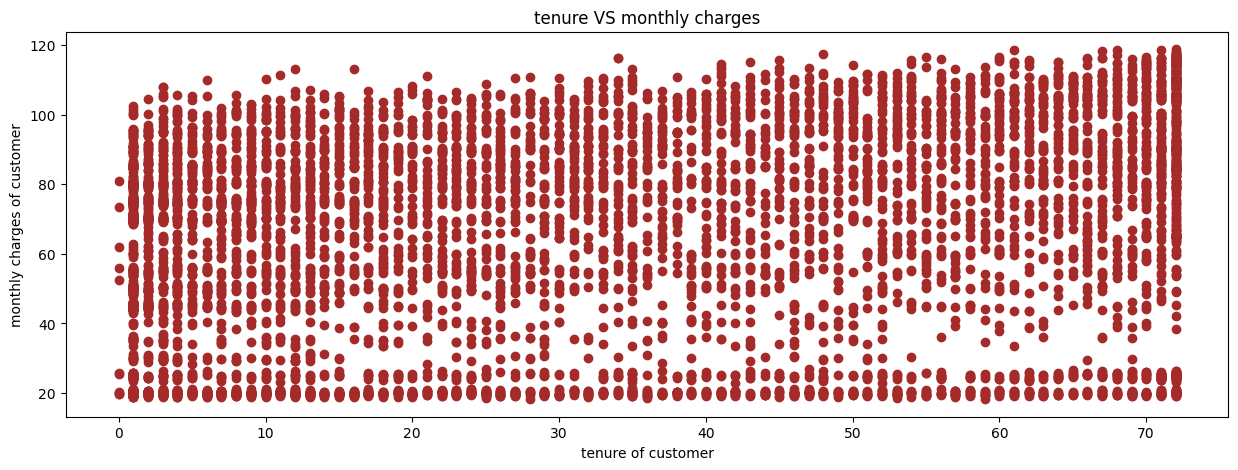

In [42]:
plt.figure(figsize=(15,5))
plt.scatter(x=df.tenure,y=df.MonthlyCharges,color='brown')
plt.xlabel('tenure of customer')
plt.ylabel('monthly charges of customer')
plt.title('tenure VS monthly charges')
plt.show()

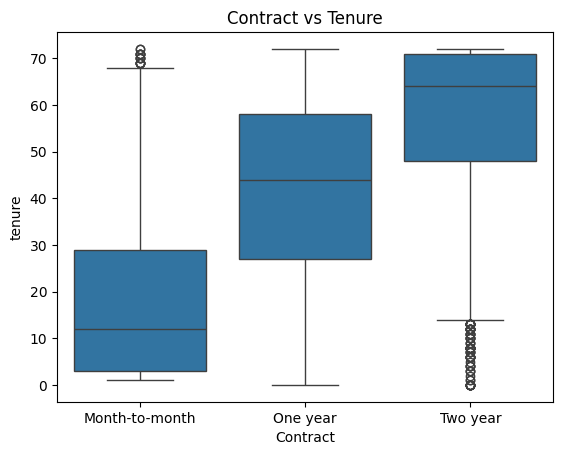

In [58]:
plt.figure()
sns.boxplot(x='Contract',y='tenure',data=df)
plt.title('Contract vs Tenure')
plt.show()
plt.show()

---------------------------- 3. Linear Regression  -------------------------------------

In [97]:
X=np.array(df['tenure']).reshape(-1,1)
y=df['MonthlyCharges']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [98]:
pre=lin_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(pre,y_test))
print("The root mean squared error is: ",error)

The root mean squared error is:  29.15550989402921


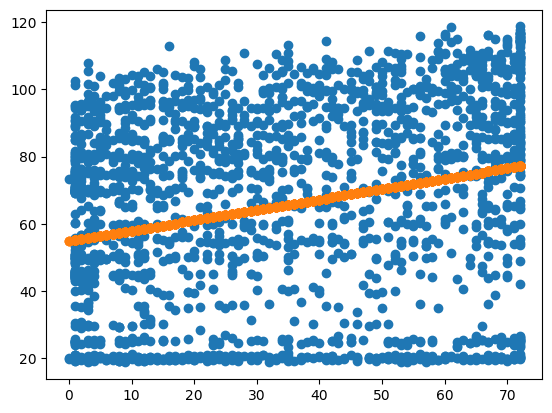

In [100]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,pre)

-------------------------------Logistic Regression-------------------------------

In [87]:
X=np.array(df['MonthlyCharges']).reshape(-1,1)
y=df['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=1)
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [90]:
pre=log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy score : ",accuracy_score(pre,y_test))
print('Confusion matrix: ')
print(confusion_matrix(pre,y_test))

Accuracy score :  0.7461476074614761
Confusion matrix: 
[[1840  626]
 [   0    0]]


----------------------------multiple Logistic Regression-------------------

In [101]:
X=df[['MonthlyCharges','tenure']]
y=df['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
mul_log_reg=LogisticRegression()
mul_log_reg.fit(X_train,y_train)

LogisticRegression()

In [102]:
pre=mul_log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy score : ",accuracy_score(pre,y_test))
print('Confusion matrix: ')
print(confusion_matrix(pre,y_test))

Accuracy score :  0.7970191625266146
Confusion matrix: 
[[965 190]
 [ 96 158]]


In [ ]:
----------------------------Decesion Tree classifier----------------

In [105]:
X=np.array(df['tenure']).reshape(-1,1)
y=df['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.tree import DecisionTreeClassifier
dec_tree_cla=DecisionTreeClassifier()
dec_tree_cla.fit(X_train,y_train)

DecisionTreeClassifier()

In [106]:
pre=dec_tree_cla.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print("Accuracy score : ",accuracy_score(pre,y_test))
print('Confusion matrix: ')
print(confusion_matrix(pre,y_test))

Accuracy score :  0.7643718949609652
Confusion matrix: 
[[983 254]
 [ 78  94]]


In [109]:
X=df[['tenure','MonthlyCharges']]
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
pre=rfc.predict(X_test)

print("Accuracy score : ",accuracy_score(pre,y_test))
print('Confusion matrix: ')
print(confusion_matrix(pre,y_test))

Accuracy score :  0.7480482611781405
Confusion matrix: 
[[899 193]
 [162 155]]
